# Problem 3

Largest prime factor

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [6]:
import numpy as np
import math


def find_smallest_prime_factor(Num, cand_prime_list):
   
    j = 0
    q = cand_prime_list[j]
    while (Num%q != 0) & (j<len(cand_prime_list)-1):
        j+=1
        q = cand_prime_list[j]
   
    if j>=len(cand_prime_list)-1:
        pri = int(Num)
    else:
        pri = q
       
       
    k = 0
    Num_by_pri = Num
    while Num_by_pri%pri == 0:
        Num_by_pri = Num_by_pri/pri
        k+=1
           
    return (pri, k), Num_by_pri    



def factorize(Num):
   
    factors = []
    rem = Num
    #cand_prime_list = sieve(math.ceil(np.sqrt(rem)))
    cand_prime_list = np.array([k for k in range(2,rem+1)])
   
    while rem>1:
        cand_prime_list = [k for k in cand_prime_list if k <= math.ceil(np.sqrt(rem))]
        next_factor, rem = find_smallest_prime_factor(rem, cand_prime_list)
        factors.append(next_factor)
       
    return factors


def find_largest_prime_factor(Num):
   
    return factorize(Num)[-1][0]


import time
start_time = time.time()


largest = find_largest_prime_factor(600851475143)

print("--- %s seconds ---" % (time.time() - start_time))

print(largest)

--- 0.006531476974487305 seconds ---
751


# Problem 7

10001st prime

By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?


In [12]:
from math import sqrt

def nth_prime(n):
    primes = [2]
    n_primes=1
    k=3
    while n_primes<n:
        if all(k%p!=0 for p in primes if p<=sqrt(k)):
            primes.append(k)
            n_primes+=1
        k+=1
    return primes[-1]

nth_prime(10001)

# Problem 9

Special Pythagorean triplet

A Pythagorean triplet is a set of three natural numbers, $a < b < c$, for which,
$a^2 + b^2 = c^2$

For example, 32 + 42 = 9 + 16 = 25 = 52.

There exists exactly one Pythagorean triplet for which $a + b + c = 1000$.
Find the product abc.

In [19]:
def pit_triple():
    
    for b in range(1,999):
        for a in range(1,b):
            c=1000-a-b
            if a**2+b**2==c**2:
                return (a,b,c), a*b*c

pit_triple()
            
            
            

((200, 375, 425), 31875000)

# Problem 11

Largest product in a grid

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?


In [115]:
matrix_file = open('11- matrix.txt')
list_matrix = matrix_file.read().split('\n')
matrix = [[int(num) for num in st.split(' ')] for st in list_matrix]

import numpy as np
from operator import mul
from functools import reduce

matrix = np.array(matrix)

def find_larg_vert_prod(matrix, n):
    
    side_length = matrix.shape[0]
    prod_max = 0
    ind_max=()
    
    for i in range(side_length-n+1):
        for j in range(side_length):
            list_to_mul = [matrix[i+k,j] for k in range(n)]
            v_prod= reduce(mul, list_to_mul, 1)
            if v_prod > prod_max:
                ind_max = (i,j)
                prod_max=v_prod
    
    return prod_max, ind_max


def find_larg_hori_prod(matrix, n):
    
    side_length = matrix.shape[0]
    prod_max = 0
    ind_max=()
    
    for j in range(side_length-n+1):
        for i in range(side_length):
            list_to_mul = [matrix[i,j+k] for k in range(n)]
            h_prod= reduce(mul, list_to_mul, 1)
            if h_prod > prod_max:
                ind_max = (i,j)
                prod_max=h_prod
    
    return prod_max, ind_max

def find_larg_diag_prod(matrix, n):
    
    side_length = matrix.shape[0]
    prod_max = 0
    ind_max=()
    
    for i in range(side_length-n+1):
        for j in range(side_length-n+1):
            list_to_mul = [matrix[i+k,j+k] for k in range(n)]
            d_prod= reduce(mul, list_to_mul, 1)
            if d_prod > prod_max:
                ind_max = (i,j)
                prod_max=d_prod
    
    return prod_max, ind_max


num=4
list_direction_max = [find_larg_hori_prod(matrix, num), find_larg_vert_prod(matrix, num), find_larg_diag_prod(matrix, num)]


def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

list_direction_max[argmax(iter([el[0] for el in list_direction_max]))]

(51267216, (6, 15))

# Problem 14

Longest Collatz sequence

The following iterative sequence is defined for the set of positive integers:

$$n → n/2 \ \textrm{(n is even)}$$
$$n → 3n + 1 \ \textrm{(n is odd)}$$

Using the rule above and starting with 13, we generate the following sequence:
$$13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1$$

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.


In [ ]:
def collatz_map(n):
    if n%2==0:
        output = n/2
    else:
        output = 3*n+1
    return output


def collatz_chain(n):
    n_iter = n
    chain = [n]
    while n_iter !=1:
        n_iter = collatz_map(n_iter)
        chain.append(n_iter)
    return chain


def longest_collatz_chain(n):
    len_max = 0
   
    for k in range(1,n+1):
           
        chain = collatz_chain(k)
        len_chain = len(chain)
       

        if len_chain > len_max:
            len_max = len_chain
            chain_max = chain
           
    return chain_max


import time
start_time = time.time()


largest = longest_collatz_chain(10**6)[0]

print("--- %s seconds ---" % (time.time() - start_time))

print(largest)


# Problem 26

Reciprocal cycles

A unit fraction contains 1 in the numerator. The decimal representation of the unit fractions with denominators 2 to 10 are given:

    1/2	= 	0.5
    1/3	= 	0.(3)
    1/4	= 	0.25
    1/5	= 	0.2
    1/6	= 	0.1(6)
    1/7	= 	0.(142857)
    1/8	= 	0.125
    1/9	= 	0.(1)
    1/10	= 	0.1

Where 0.1(6) means 0.166666..., and has a 1-digit recurring cycle. It can be seen that 1/7 has a 6-digit recurring cycle.

Find the value of d < 1000 for which 1/d contains the longest recurring cycle in its decimal fraction part.


In [ ]:
def period_inv_integer(n):
    k=1
    num = int(n)
    while (num%2==0) | (num%5 ==0):
        if num%2==0:
            num = int(num/2)
        if num%5==0:
            num = int(num/5)
       
    while ((10**k-1)%num) > 0:
        k+=1
   
    return k

Num=1000
lperiods = [period_inv_integer(k) for k in range(1, Num+1)]

m = max(lperiods)
ind_max=[(i+1) for i, j in enumerate(lperiods) if j == m][0]
   
print('Maximium period is obtained for 1/'+str(ind_max)+' and is equal to '+str(m)+'.')

# Problem 28

Number spiral diagonals

Starting with the number 1 and moving to the right in a clockwise direction a 5 by 5 spiral is formed as follows:

$$21 \ 22 \ 23 \ 24 \ 25\\
20 \ 07 \  08 \  09 \ 10\\
19 \ 06 \ 01 \ 02 \ 11\\
18 \ 05 \ 04 \ 03 \ 12\\
17 \ 16 \ 15 \ 14 \ 13$$

It can be verified that the sum of the numbers on the diagonals is 101.

What is the sum of the numbers on the diagonals in a 1001 by 1001 spiral formed in the same way?

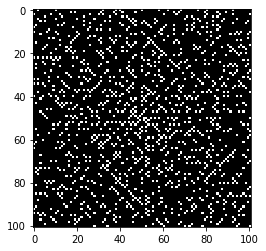

In [4]:
#Started solving this problem but ended up doing an Ulam Spiral, as it was more fun!

import numpy as np
import math

Num = 1001

def add_to_List(List,n):
    if n%2==1:
        output = List + ['R']*n+['D']*n
    else:
        output = List + ['L']*n+['U']*n
    return output


List = []
n=1
while len(List)<Num**2:
    List = add_to_List(List,n)
    n+=1
   
#print(List[:Num**2-1])

dic = {'R':(1,0),
       'D':(0,1),
       'L':(-1,0),
       'U':(0,-1)    
}

indices = np.cumsum(np.array([((Num-1)/2+1,(Num-1)/2+1)] + [dic[item] for item in List[:Num**2-1]]),axis = 0)-[1,1]

#print(indices)

Mat = np.zeros([Num,Num])

for k in range(0,Num**2):
    ind=indices[k]
   
    Mat[int(ind[1]),int(ind[0])] = k+1
   
#print(Mat)

def is_prime(n):
    if n==1:
        boo = False
    elif n % 2 == 0 and n > 2:
        boo= False
    else:
        boo= all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
       
    if boo:
        output = 1
    else:
        output = 0
   
    return output
   
   

foo = np.vectorize(is_prime)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(foo(Mat), cmap='gray', vmin=0, vmax=1)
plt.show()


# Problem 31

Coin sums

In England the currency is made up of pound, £, and pence, p, and there are eight coins in general circulation:

    1p, 2p, 5p, 10p, 20p, 50p, £1 (100p) and £2 (200p).

It is possible to make £2 in the following way:

    1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p

How many different ways can £2 be made using any number of coins?


In [39]:
from math import floor

def count_coin(list_coins,N_coin):
    pivot_coin=list_coins[-1]
    
    if list_coins==[1]:
        out=1
    else:
        out=0
        for k in range(0,floor(N_coin/pivot_coin)+1):
            out += count_coin(list_coins[:-1],N_coin-k*pivot_coin)
    
    return out

In [40]:
list_coins = [1,2,5,10,20,50,100,200]
N_coin=200
count_coin(list_coins,N_coin)

73682

# Problem 34

Digit factorials

145 is a curious number, as 1! + 4! + 5! = 1 + 24 + 120 = 145.

Find the sum of all numbers which are equal to the sum of the factorial of their digits.

Note: as 1! = 1 and 2! = 2 are not sums they are not included.

In [ ]:
from math import log, floor, factorial
from scipy import optimize

def bounds_fun(n):
    return floor((log(n)/log(10))+1)*factorial(9) - n


def curious_numbers():
   

    bound=int(optimize.brentq(bounds_fun,1,10**8))+1
    curious_list = []
   
    for k in range(bound+1):
        if k== sum([factorial(int(st)) for st in str(k)]):
            curious_list.append(k)
           
    return curious_list
   

sum(curious_numbers())

# Problem 35

Circular primes

The number, 197, is called a circular prime because all rotations of the digits: 197, 971, and 719, are themselves prime.

There are thirteen such primes below 100: 2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, and 97.

How many circular primes are there below one million?


In [ ]:
def cyclic_permutations(n):
    per_0 = list(range(n))
    per = list(range(n))
    list_perm = []
   
    while (list_perm == []) | (per != per_0):
        list_perm.append([i for i in per])
        per.insert(0,per[-1])
        per = per[:-1]
    return list_perm

def is_prime(n):
    if n==1:
        boo = False
    elif n % 2 == 0 and n > 2:
        boo= False
    else:
        boo= all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
   
    return boo
   
   

foo = np.vectorize(is_prime)



import time
start_time = time.time()


Num =1000000


lisprimes = list_primes_leq_than(Num)
circ_primes = []

for prime in lisprimes:

    num_list = list(str(prime))
    num_len = len(num_list)

    is_circ = foo([int(''.join([num_list[i] for i in perm])) for perm in cyclic_permutations(num_len)]).all()
   
    if is_circ:
        circ_primes.append(prime)
       


largest = circ_primes

print("--- %s seconds ---" % (time.time() - start_time))

print(len(largest))


# Problem 42

Coded triangle numbers

The nth term of the sequence of triangle numbers is given by, tn = ½n(n+1); so the first ten triangle numbers are:

1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

By converting each letter in a word to a number corresponding to its alphabetical position and adding these values we form a word value. For example, the word value for SKY is 19 + 11 + 25 = 55 = t10. If the word value is a triangle number then we shall call the word a triangle word.

Using words.txt (right click and 'Save Link/Target As...'), a 16K text file containing nearly two-thousand common English words, how many are triangle words?


In [43]:
words_file = open("words.txt")
list_words = words_file.read().split(',')
list_words = [st[1:-1] for st in list_words]

from string import ascii_lowercase


LETTERS = {letter: str(index) for index, letter in enumerate(ascii_lowercase, start=1)} 

def guematric_sum(word):
    
    return sum([int(LETTERS[char.lower()]) for char in word])

from math import sqrt

len([word for word in list_words if sqrt(1+8*guematric_sum(word))%2==1])

162

# Problem 46

Goldbach's other conjecture

It was proposed by Christian Goldbach that every odd composite number can be written as the sum of a prime and twice a square.

9 = 7 + 2×12
15 = 7 + 2×22
21 = 3 + 2×32
25 = 7 + 2×32
27 = 19 + 2×22
33 = 31 + 2×12

It turns out that the conjecture was false.

What is the smallest odd composite that cannot be written as the sum of a prime and twice a square?

In [5]:
# This does not currently run for some reason

from math import sqrt

def list_primes(n):
    primes = [2]
    n_primes=1
    k=3
    while n_primes<n:
        if all(k%p!=0 for p in primes if p<=sqrt(k)):
            primes.append(k)
            n_primes+=1
        k+=1
    return primes

def is_prime(n):
    if n==1:
        boo = False
    elif n % 2 == 0 and n > 2:
        boo= False
    else:
        boo= all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
   
    return boo

def prime_num(n):
    return list_primes(n)[-1]


def next_odd_composite(odd_num):
    cand_next = odd_num+2
   
    while is_prime(cand_next):
        cand_next += 2
       
    return cand_next


flag = 0
Num = 1
while flag==0:
   
    Num = next_odd_composite(Num)
    kp=1
    prime = prime_num(kp)
    num_to_sq = 1
    num_cand = prime + 2*num_to_sq**2
    flag = 1
   
    while num_cand<=Num:
        num_to_sq = 1
        num_cand = prime + 2*num_to_sq**2
       
        while num_cand<=Num:
           
            if num_cand ==Num:
                flag=0
           
            num_to_sq += 1
       
        kp+=1
        prime = prime_num(kp)
   
Num


KeyboardInterrupt: 

# Problem 48

Self powers

The series, 11 + 22 + 33 + ... + 1010 = 10405071317.

Find the last ten digits of the series, 11 + 22 + 33 + ... + 10001000.


In [ ]:
from math import sqrt

def primes_smaller(n):
    primes = [2]
    n_primes=1
    k=3
    while k<=n:
        if all(k%p!=0 for p in primes if p<=sqrt(k)):
            primes.append(k)
            n_primes+=1
        k+=1
    return primes

def factorize(n):
    primes = primes_smaller(n)
    prime_factors = [p for p in primes if n%p==0]
    
    factor_powers =[]
    
    for p in prime_factors:
        k=1
        while n%(p**k)==0:
            k+=1
            
        factor_powers.append((p,k-1))
        
    return factor_powers

from math import gcd

def phi(n):
    amount = 0        
    for k in range(1, n + 1):
        if gcd(n, k) == 1:
            amount += 1
    return amount

from math import floor

def return_kj(n):
    phi_n=phi(n)
    k=floor(n/phi_n)
    r=n%phi_n
    return (k,r)

return_kj(100)


# Problem 55

Lychrel numbers

If we take 47, reverse and add, 47 + 74 = 121, which is palindromic.

Not all numbers produce palindromes so quickly. For example,

349 + 943 = 1292,
1292 + 2921 = 4213
4213 + 3124 = 7337

That is, 349 took three iterations to arrive at a palindrome.

Although no one has proved it yet, it is thought that some numbers, like 196, never produce a palindrome. A number that never forms a palindrome through the reverse and add process is called a Lychrel number. Due to the theoretical nature of these numbers, and for the purpose of this problem, we shall assume that a number is Lychrel until proven otherwise. In addition you are given that for every number below ten-thousand, it will either (i) become a palindrome in less than fifty iterations, or, (ii) no one, with all the computing power that exists, has managed so far to map it to a palindrome. In fact, 10677 is the first number to be shown to require over fifty iterations before producing a palindrome: 4668731596684224866951378664 (53 iterations, 28-digits).

Surprisingly, there are palindromic numbers that are themselves Lychrel numbers; the first example is 4994.

How many Lychrel numbers are there below ten-thousand?

NOTE: Wording was modified slightly on 24 April 2007 to emphasise the theoretical nature of Lychrel numbers.


In [ ]:
def reverse_number(Num):
    num_list = list(str(Num))
    rev_num_list = num_list[::-1]

    rev_Num = int(''.join(rev_num_list))
   
    return rev_Num

def is_palindrome(Num):
    return Num==reverse_number(Num)

   
def reverse_and_add(Num):
    return Num + reverse_number(Num)

limit = 10000

Lychrel_list = []

for Num in range(1,limit+1):

    i=1
    N_iter = reverse_and_add(Num)
    while (i<=50) & (not is_palindrome(N_iter)):
        N_iter = reverse_and_add(N_iter)
        i+=1

    if i==51:
        Lychrel_list.append(Num)
   
len(Lychrel_list)